In [ ]:
!pip install tensorflow
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Embedding
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
(xtrain, ytrain),(xtest, ytest) = imdb.load_data(num_words= 10000)

In [ ]:
xtrain.shape

(25000,)

In [ ]:
xtrain = pad_sequences(xtrain, 20)
xtest = pad_sequences(xtest, 20)
print(len(xtrain[0]))
print(len(xtest[0]))

20
20


In [ ]:
model = models.Sequential()
model.add(Embedding(10000, 8, input_length = 20))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten_1 (Flatten)         (None, 160)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(xtrain, ytrain, epochs = 10, batch_size=100, validation_split=0.2)

Epoch 1/10
200/200 [==============================] - 12s 59ms/step - loss: 0.6854 - accuracy: 0.5888 - val_loss: 0.6702 - val_accuracy: 0.6624
Epoch 2/10
200/200 [==============================] - 2s 10ms/step - loss: 0.6276 - accuracy: 0.7219 - val_loss: 0.5999 - val_accuracy: 0.7066
Epoch 3/10
200/200 [==============================] - 1s 7ms/step - loss: 0.5449 - accuracy: 0.7574 - val_loss: 0.5438 - val_accuracy: 0.7248
Epoch 4/10
200/200 [==============================] - 1s 5ms/step - loss: 0.4853 - accuracy: 0.7825 - val_loss: 0.5152 - val_accuracy: 0.7408
Epoch 5/10
200/200 [==============================] - 1s 6ms/step - loss: 0.4462 - accuracy: 0.8026 - val_loss: 0.5015 - val_accuracy: 0.7486
Epoch 6/10
200/200 [==============================] - 1s 6ms/step - loss: 0.4178 - accuracy: 0.8182 - val_loss: 0.4955 - val_accuracy: 0.7506
Epoch 7/10
200/200 [==============================] - 1s 6ms/step - loss: 0.3952 - accuracy: 0.8308 - val_loss: 0.4920 - val_accuracy: 0.7536
Epo

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 11

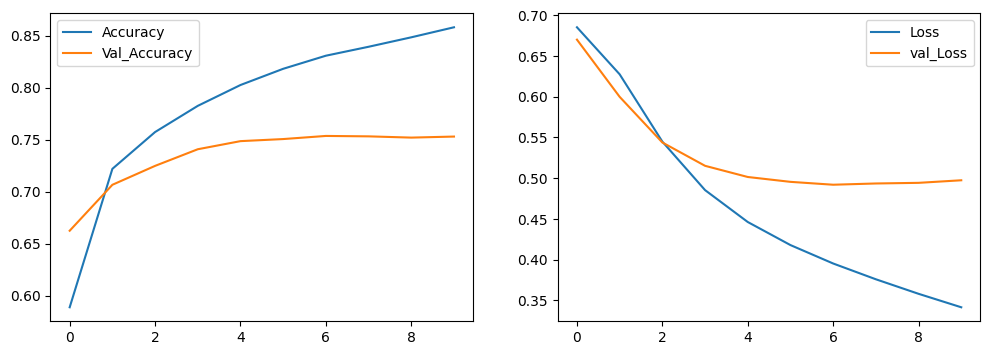

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (12,4))
ax[0].plot(acc, label = "Accuracy")
ax[0].plot(val_acc, label = "Val_Accuracy")
ax[0].legend()
ax[1].plot(loss, label = "Loss")
ax[1].plot(val_loss, label = "val_Loss")
ax[1].legend()